# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Load Data

In [2]:
bank_csv = pd.read_csv('dataset/bank.csv', delimiter=';')
bank_csv

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Exploratory Data

In [3]:
bank_csv.shape

(4521, 17)

In [4]:
bank_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# Mengubah tipe data object menjadi category
obj_col_list = bank_csv.columns[bank_csv.dtypes == 'object'].to_list()
for col in obj_col_list:
    bank_csv[col] = bank_csv[col].astype('category')
bank_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


In [6]:
bank_csv.isnull().sum() # Untuk mengecek missing value

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bank_csv.describe() # Untuk melihat distribusi statistik

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
bank_csv.duplicated().sum() # Untuk mengecek data duplikat

0

# Visualization & Analysis Data

## By Job

**Visualization**

Visualisasi ini untuk mengecek berapa banyak yang membuka deposit berdasarkan pekerjaan, dan mengecek berapa rata-rata saldo dan median untuk tiap bidang pekerjaan.

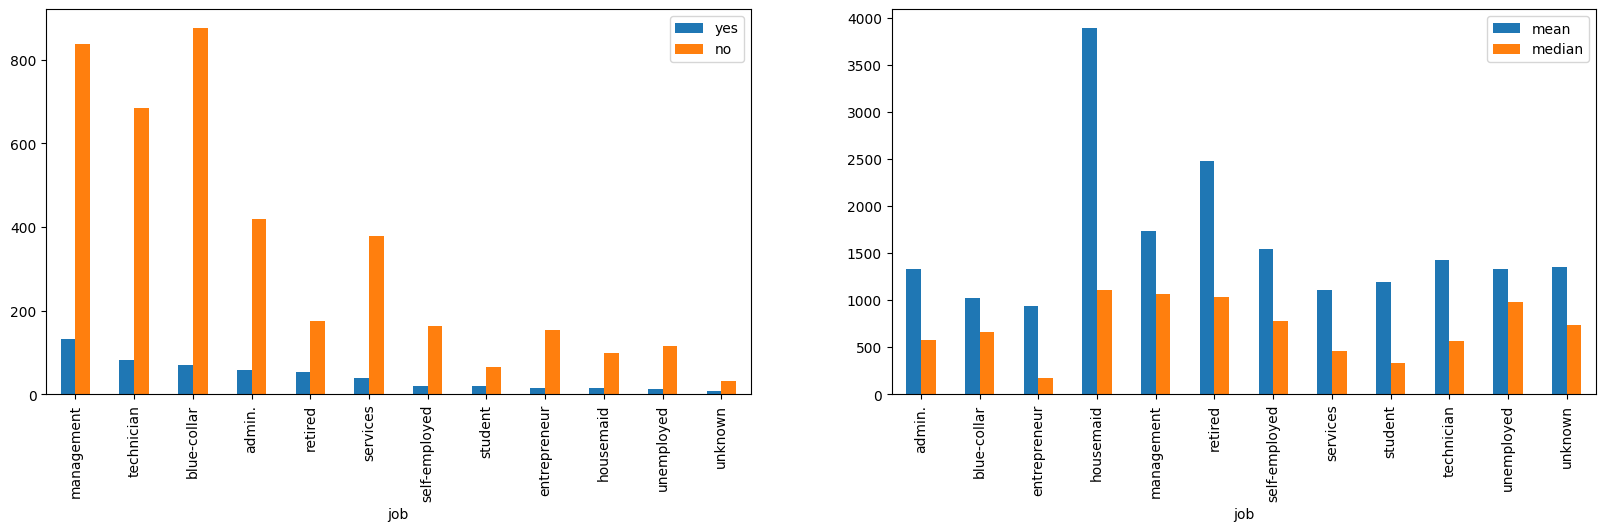

In [9]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

job_yn = pd.DataFrame()
job_yn['yes'] = bank_csv[bank_csv['y'] == 'yes']['job'].value_counts()
job_yn['no'] = bank_csv[bank_csv['y'] == 'no']['job'].value_counts()
job_yn.plot(kind='bar', ax=ax0)

job_balance = bank_csv[bank_csv['y'] == 'yes']
job_balance = job_balance.pivot_table(
    index='job',
    values='balance',
    aggfunc=[np.mean, np.median]
)
job_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

**Conclusion**

1. Bidang pekerjaan yang paling banyak diobservasi adalah management dan blue-collar
2. Kebanyakan dari mereka, untuk tiap bidang pekerjaan, menolak untuk membuka deposit
3. Management yang paling banyak membuka deposit
4. Bagi yang membuka deposit, bidang pekerjaan dengan rata - rata saldo dan median tertinggi adalah pada housemaid dan retired

## By Marital

**Visualization**

Menggunakan Pie Chart, akan dilihat seberapa banyak yg divorced, married, dan single.

Text(0.5, 1.0, 'Marital Percentage')

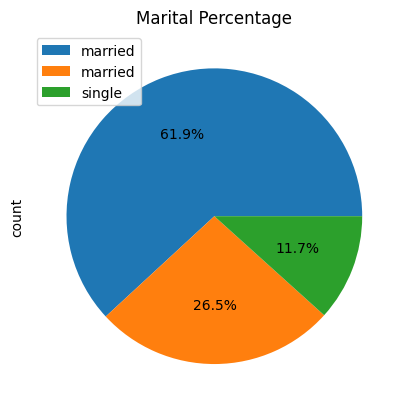

In [10]:
bank_csv['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.legend(labels=bank_csv['marital'], loc='upper left')
plt.title('Marital Percentage')

Sama seperti job, disini akan dicek berapa banyak yang membuka deposit berdasarkan marital dan berapa banyak rata - rata balance dan mediannya.

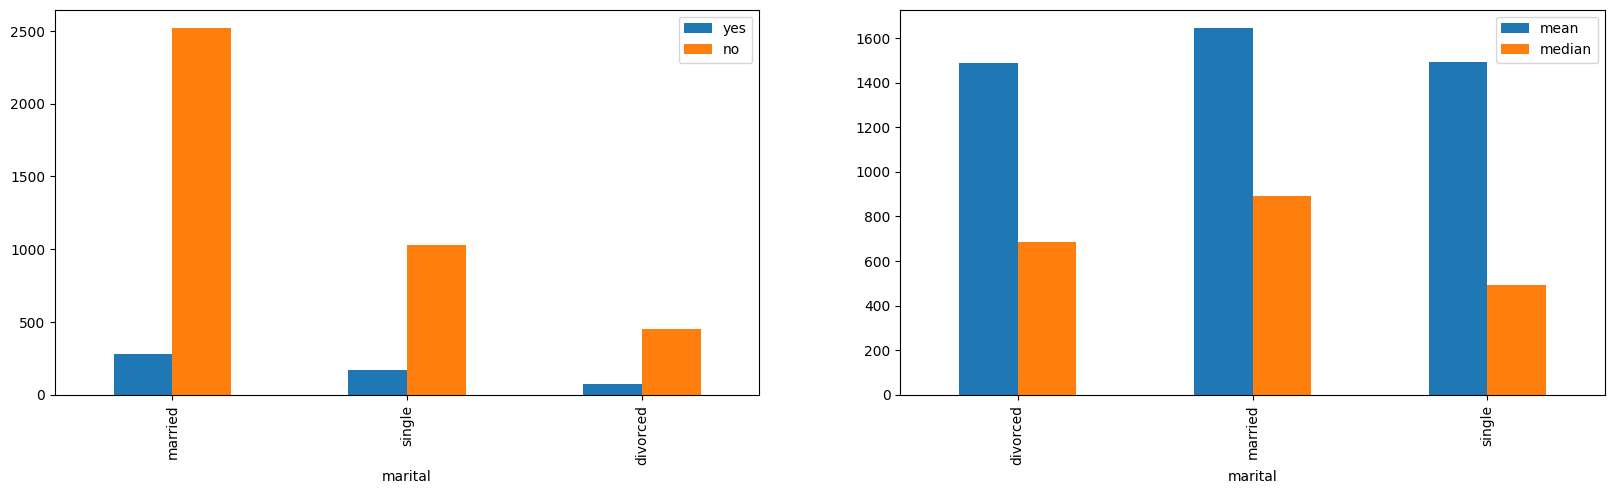

In [11]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

marital_yn = pd.DataFrame()
marital_yn['yes'] = bank_csv[bank_csv['y'] == 'yes']['marital'].value_counts()
marital_yn['no'] = bank_csv[bank_csv['y'] == 'no']['marital'].value_counts()
marital_yn.plot(kind='bar', ax=ax0)

marital_balance = bank_csv[bank_csv['y'] == 'yes']
marital_balance = marital_balance.pivot_table(
    index='marital',
    values='balance',
    aggfunc=[np.mean, np.median]
)
marital_balance.plot(kind='bar', ax=ax1, figsize=(20, 5))
plt.legend(['mean', 'median'])

**Conclusion**

1. Lebih banyak yang telah married dibandingkan status marital lainnya
2. Sama seperti job, rata - rata lebih banyak yang tidak membuka deposit
3. Married lebih banyak yang membuka deposit
4. Balance married yang tertinggi, sedangkan divorced dan single memiliki nilai yang berdekatan

## By Education

**Visualization**

Melihat hubungan antara education terhadap martial dan job

<Axes: xlabel='marital'>

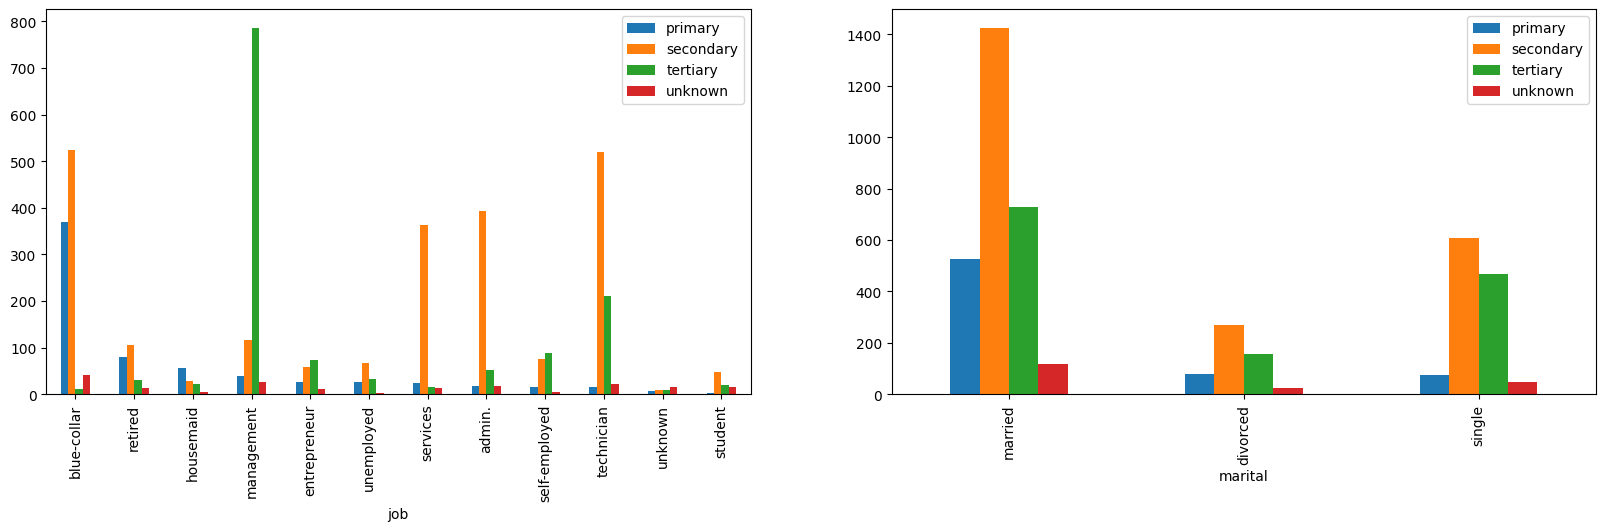

In [12]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


edu_list = list(bank_csv['education'].unique())

edu_job = pd.DataFrame()
for edu in edu_list:
    edu_job[edu] = bank_csv[bank_csv['education'] == edu]['job'].value_counts()
edu_job.plot(kind='bar', ax=ax0)

edu_marital = pd.DataFrame()
for edu in edu_list:
    edu_marital[edu] = bank_csv[bank_csv['education'] == edu]['marital'].value_counts()
edu_marital.plot(kind='bar', ax=ax1, figsize=(20, 5))

**Conclusion**

1. Kebanyakan dari mereka di tiap bidang pekerjaan telah menyelesaikan secondary dan tertiary
2. Tidak ada perbedaan yang signifikan pada hubungan marital dengan education, hanya berbeda jumlah data yang diobservasi

## Correlation

**Visualization**

Digunakan untuk melihat korelasi antar kolom

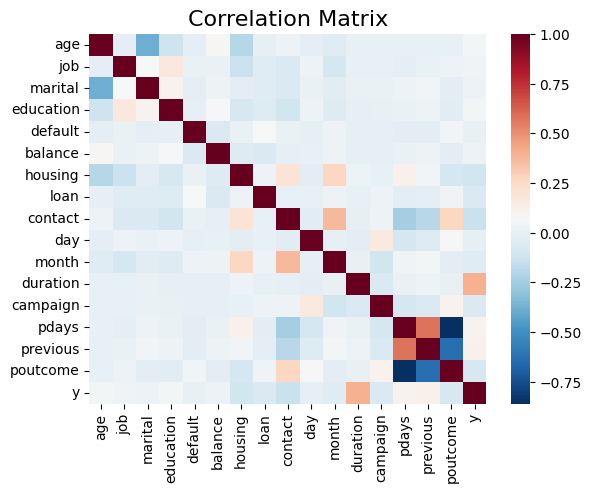

<Figure size 2000x2000 with 0 Axes>

In [13]:
cat_col_list = bank_csv.columns[bank_csv.dtypes == 'category'].to_list()
for col in cat_col_list:
    bank_csv[col] = preprocessing.LabelEncoder().fit_transform(bank_csv[col])

x = bank_csv.iloc[:, 0:16]
y = bank_csv.iloc[:, -1]

corrmat = bank_csv.corr()
sns.heatmap(bank_csv[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

**Conclusion**

Dari hasil visualisasi heatmap, kolom duration memiliki korelasi paling kuat terhadap y dibandingkan kolom lainnya.

## Features Importance

**Visualization**

Bagian ini digunakan untuk melihat kolom yang penting dan paling berpengaruh kepada kolom y.

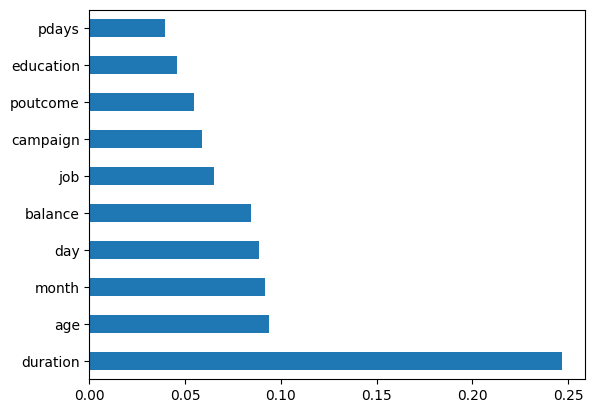

In [14]:
model = ExtraTreesClassifier()
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Concusion**

Sama seperti correlation, duration paling berpengaruh untuk kolom y. Selain duration, pengaruh paling besar selanjutnya diikuti oleh month, age, day, balance, job.

# Classification Model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Logistic Regresion

**Model**

In [16]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [17]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8887251289609432 

Confusion Matrix :
 [[1176   29]
 [ 122   30]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.51      0.20      0.28       152

    accuracy                           0.89      1357
   macro avg       0.71      0.59      0.61      1357
weighted avg       0.86      0.89      0.87      1357



## KNN

**Model**

In [18]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [19]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8754605747973471 

Confusion Matrix :
 [[1154   51]
 [ 118   34]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1205
           1       0.40      0.22      0.29       152

    accuracy                           0.88      1357
   macro avg       0.65      0.59      0.61      1357
weighted avg       0.85      0.88      0.86      1357



## SVM

**Model**

In [20]:
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [21]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8872512896094326 

Confusion Matrix :
 [[1204    1]
 [ 152    0]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1205
           1       0.00      0.00      0.00       152

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.83      1357



## Decision Tree

**Model**

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [23]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8592483419307295 

Confusion Matrix :
 [[1112   93]
 [  98   54]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.37      0.36      0.36       152

    accuracy                           0.86      1357
   macro avg       0.64      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357



## Random Forest

**Model**

In [24]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [25]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8953574060427414 

Confusion Matrix :
 [[1174   31]
 [ 111   41]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.57      0.27      0.37       152

    accuracy                           0.90      1357
   macro avg       0.74      0.62      0.65      1357
weighted avg       0.88      0.90      0.88      1357



## Naive Bayyes

**Model**

In [26]:
model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

**Result**

In [27]:
print("Accuracy Score :",accuracy_score(y_test, pred_test),"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8253500368459837 

Confusion Matrix :
 [[1049  156]
 [  81   71]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1205
           1       0.31      0.47      0.37       152

    accuracy                           0.83      1357
   macro avg       0.62      0.67      0.64      1357
weighted avg       0.86      0.83      0.84      1357



## Algorithm Analysis

Untuk mengembangkan Machine Learning dataset ini, maka model algoritma yang dipilih adalah Random Forest dikarenakan dari classification reportnya ditunjukkan bahwa akurasinya paling tinggi dibandingkan model algoritma lainnya.